In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/retail_store_sales.csv")

In [3]:
#handling missing values in three columns
df = df.dropna(subset=['Price Per Unit', 'Quantity', 'Total Spent'])


In [4]:
#filling 10% null values in Item columns as unknown
df['Item'] = df['Item'].fillna('Unknown')


In [5]:
#Structuring the transaction date by converting them to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [6]:
df['Discount Applied'] = df['Discount Applied'].fillna('No')


In [7]:
rem_missing_values = df.isnull().sum()

In [8]:
print(rem_missing_values)

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64


In [9]:
print("Dataset shape after cleaning :", df.shape)


Dataset shape after cleaning : (11362, 11)


In [10]:
sns.set(style="whitegrid")


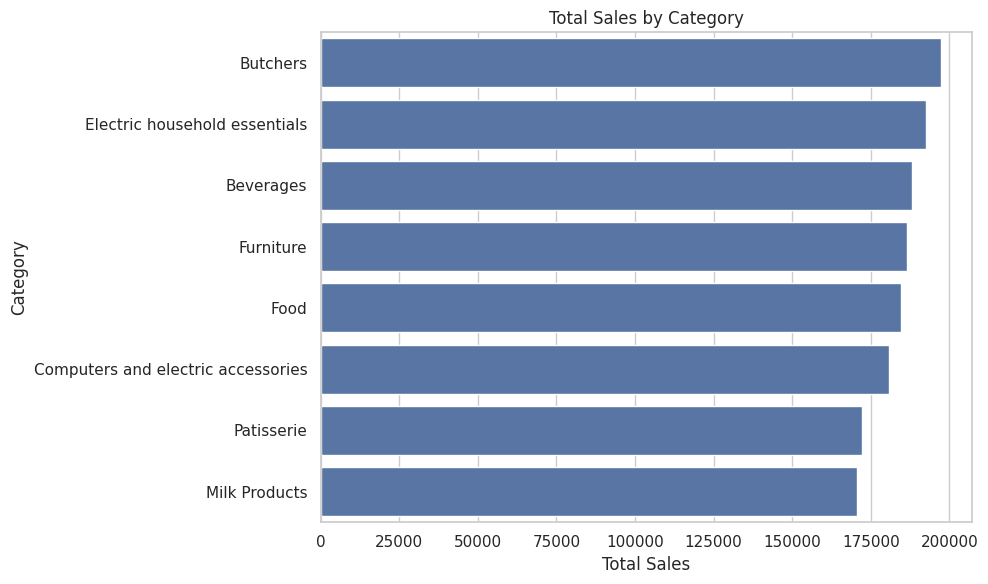

In [13]:
#1st visualization of category wise total sales (barplot)
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

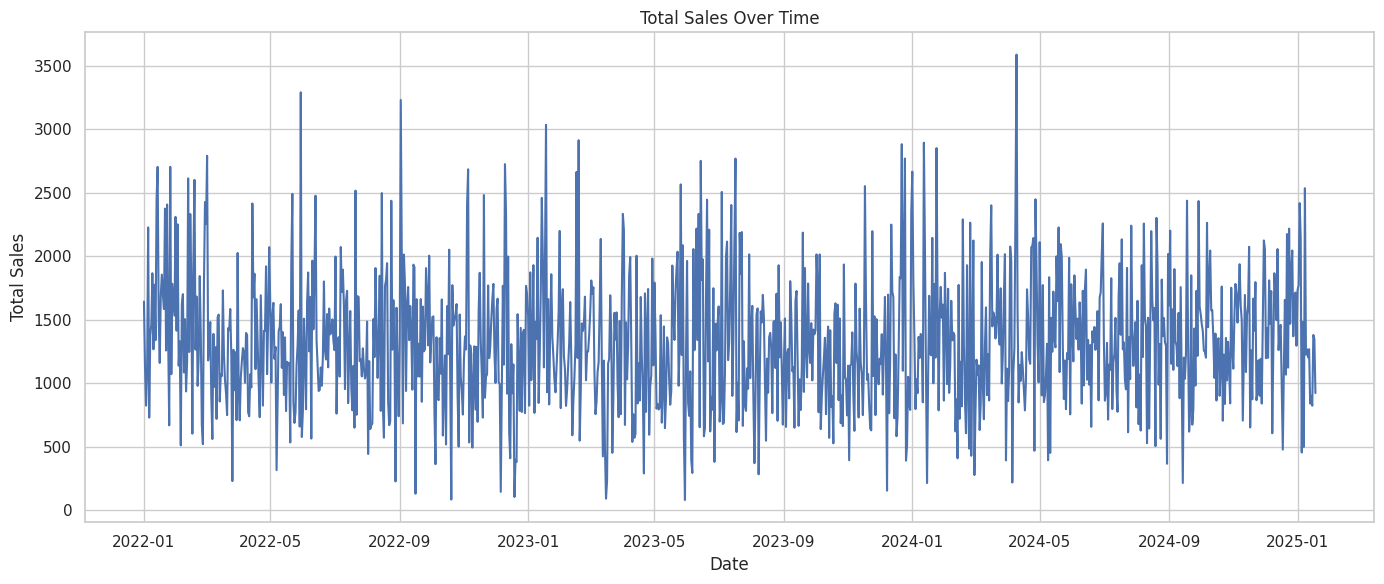

In [14]:
#2nd visualization of daily sales over time (LinePlot)
daily_sales = df.groupby(df['Transaction Date'].dt.date)['Total Spent'].sum()
plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


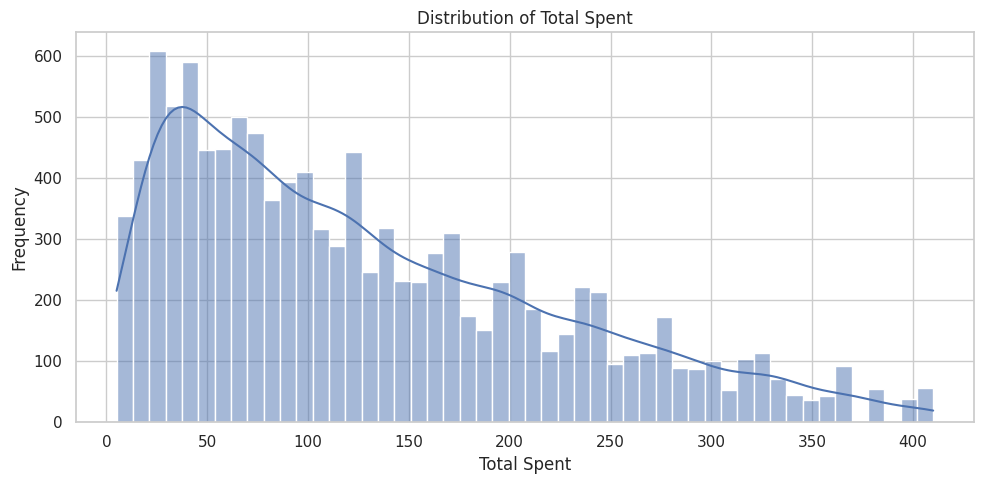

In [15]:
#3rd visualization of distrubtion of total spent (countplot)
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Spent'], bins=50, kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


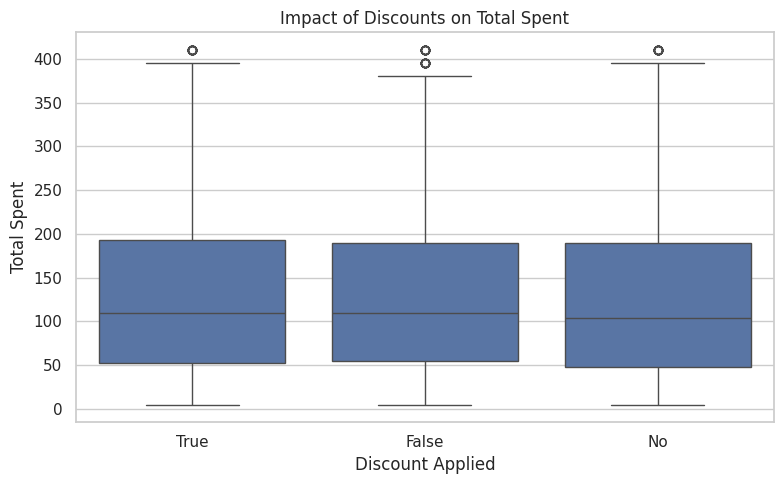

In [16]:
#4th visulazation of Discount impact on Total Spent (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Discount Applied', y='Total Spent')
plt.title('Impact of Discounts on Total Spent')
plt.tight_layout()
plt.show()

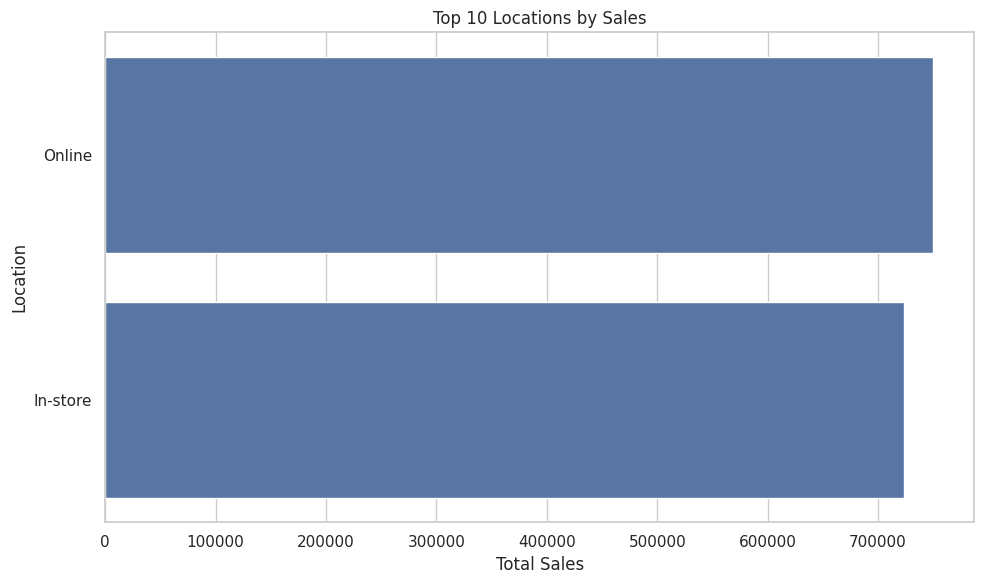

In [17]:
#5th visualization of getting top 10 location by sales (barplot)
top_locations = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [18]:
# The reasoning behind choosing each library or technique.
# Pandas - For data manipulation and cleaning purpose
# Mattplotlib - For creating basic or static plots
# Seaborn - It is same as matplotlib but it gives more attractive plot
# Numpy - For mathematical operations which is used by internally by pandas and seaborn